In [ ]:
#all_skip

In [ ]:
!apt-get install libsnappy-dev -y
!pip install omegaconf torch python-snappy music21 fastparquet "git+https://github.com/fastai/fastai2"
!ln -s ../neuralmusic neuralmusic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libsnappy1v5
The following NEW packages will be installed:
  libsnappy-dev libsnappy1v5
0 upgraded, 2 newly installed, 0 to remove and 89 not upgraded.
Need to get 43.2 kB of archives.
After this operation, 156 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libsnappy1v5 amd64 1.1.7-1 [16.0 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libsnappy-dev amd64 1.1.7-1 [27.2 kB]
Fetched 43.2 kB in 0s (620 kB/s)         
debconf: delaying package configuration, since apt-utils is not installed
Selecting previously unselected package libsnappy1v5:amd64.
(Reading database ... 23699 files and directories currently installed.)
Preparing to unpack .../libsnappy1v5_1.1.7-1_amd64.deb ...
Unpacking libsnappy1v5:amd64 (1.1.7-1) ...
Selecting previously unselected package libsnappy-dev:amd

In [ ]:
from omegaconf import OmegaConf

from neuralmusic.data.preprocessing import process
from neuralmusic.training import get_learner, train
from neuralmusic.model import get_model

from pathlib import Path

data_path = '/mnt/data'
data_path

'/mnt/data'

In [ ]:
databunch, pitch_vocab, duration_vocab = process(data_path, batch_size=64, seq_len=20)

In [ ]:
name = 'experiment'
emb_size = 800
rnn_size = 400
rnn_layers = 2

dot_list = [f"name={name}", f"emb_size={emb_size}", f"rnn_size={rnn_size}", f"rnn_layers={rnn_layers}"]
model_cfg = OmegaConf.from_dotlist(dot_list)

model = get_model(model_cfg, pitch_vocab, duration_vocab)
model

TheModel(
  (pitch_emb): Embedding(1008, 800, padding_idx=1)
  (duration_emb): Embedding(24, 800, padding_idx=1)
  (pitch_rnn): GRU(800, 400, num_layers=2)
  (duration_rnn): GRU(800, 400, num_layers=2)
  (pitch_dec): LinearDecoder(
    (decoder): Linear(in_features=800, out_features=1008, bias=True)
    (output_dp): RNNDropout()
  )
  (duration_dec): LinearDecoder(
    (decoder): Linear(in_features=800, out_features=24, bias=True)
    (output_dp): RNNDropout()
  )
)

In [ ]:
learn = get_learner(databunch, model)

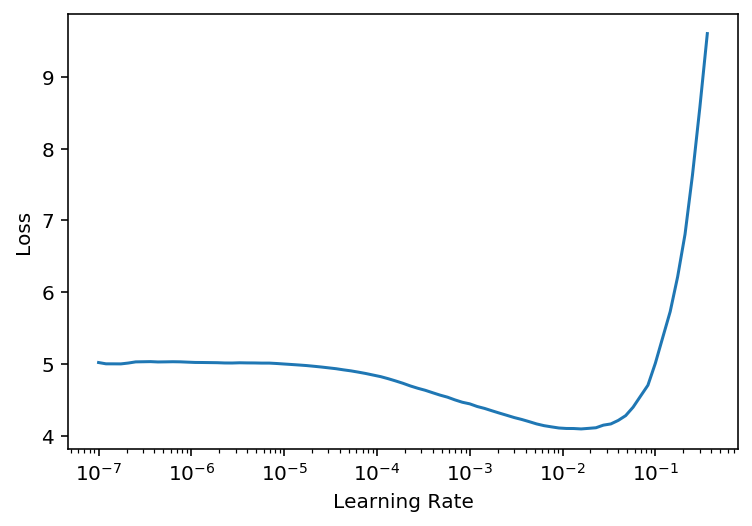

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(10, lr_max=1e-03)

epoch,train_loss,valid_loss,pitch_accuracy,rhythm_accuracy,avg_accuracy,time
0,3.034395,3.046061,0.192847,0.345833,0.269340,00:56
1,3.004076,3.119839,0.208042,0.335465,0.271754,00:56
2,3.061586,3.134726,0.172597,0.337785,0.255191,00:55
3,2.937284,3.065820,0.209889,0.355715,0.282802,00:55
4,2.951938,3.061687,0.212181,0.357132,0.284656,00:55
5,2.917730,3.016338,0.187625,0.346000,0.266812,00:56
6,2.919829,2.992125,0.212181,0.356722,0.284451,00:55
7,2.943019,2.950234,0.212181,0.353389,0.282785,00:56
8,2.866367,2.925122,0.212181,0.353160,0.282670,00:56
9,2.942302,2.915703,0.212181,0.357049,0.284615,00:56


In [ ]:
#skip
import torch
from neuralmusic.model import predict
from neuralmusic.midi import parse_midi_file, row_to_triplets
    
df = parse_midi_file("data/rugrats.mid")
triplets = row_to_triplets(df, 0)
prompt = triplets[20:50]

predicted = predict(torch.device('cuda'), model, prompt, pitch_vocab, duration_vocab, n_notes=50)
predicted

[('C4', 'half'),
 ('G3', 'eighth'),
 ('G4', 'complex'),
 ('G3', 'complex'),
 ('G4', 'quarter'),
 ('G4', 'half'),
 ('G3', 'half'),
 ('C2', 'complex'),
 ('C2', 'quarter'),
 ('R', 'eighth'),
 ('R', 'eighth'),
 ('G4', 'half'),
 ('G4', 'eighth'),
 ('C2', 'complex'),
 ('G4', 'eighth'),
 ('G3', 'half'),
 ('G4', 'half'),
 ('G4', 'quarter'),
 ('R', 'eighth'),
 ('C2', 'half'),
 ('C2', 'quarter'),
 ('G4', 'quarter'),
 ('R', '16th'),
 ('G3', 'quarter'),
 ('G3', 'eighth'),
 ('C4', '16th'),
 ('G4', '16th'),
 ('G3', '16th'),
 ('G3', 'complex'),
 ('C2', 'half'),
 ('G4', 'quarter'),
 ('G3', 'complex'),
 ('R', 'eighth'),
 ('R', 'quarter'),
 ('G4', 'complex'),
 ('C4', 'complex'),
 ('G4', '16th'),
 ('R', 'quarter'),
 ('C4', 'quarter'),
 ('R', 'quarter'),
 ('C2', 'complex'),
 ('R', 'complex'),
 ('R', '16th'),
 ('R', '16th'),
 ('G4', 'half'),
 ('C2', 'complex'),
 ('G3', 'quarter'),
 ('R', 'eighth'),
 ('C4', 'complex'),
 ('R', '16th')]

# Generating music

In [ ]:
!apt-get update && apt-get install fluidsynth -y
!wget ftp://ftp.osuosl.org/pub/musescore/soundfont/MuseScore_General/MuseScore_General.sf3
!pip install midi2audio

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  adwaita-icon-theme at-spi2-core dconf-gsettings-backend dconf-service
  fluid-soundfont-gm fontconfig glib-networking glib-networking-common
  glib-networking-services gsettings-desktop-schemas gtk-update-icon-cache
  hicolor-icon-theme humanity-icon-theme libasound2 libasound2-data
  libasyncns0 libatk-bridge2.0-0 libatk1.0-0 libatk1.0-data libatspi2.0-0
  libavahi-client3 libavahi-common-data libavahi-common3 libcairo-gobject2
  libcairo2 libcolord2 libcroco3 libcups2 libdatrie1 libdconf1
  libdouble-conversion1 libdrm-amdgpu1 libdrm-common libdrm-intel1
  libdrm-nouveau2 libdrm-radeon1 libdrm2 libegl-mesa0 libegl1 libelf1
  libepoxy0 libevdev2 libflac8 libfluidsynth1 libgbm1 libgdk-pixbuf2.0-0
  libgdk-pixbuf2.0-bin libgdk-pixbuf2.0-common libgl1 libgl1-mesa-dri
  libglapi-mesa libglvnd0 libglx-mesa0 libglx0 libgraphite2-3 libgtk-3-0


In [ ]:
%load_ext music21.ipython21.ipExtension

import json, random

from IPython.core.display import display, HTML, Javascript
from IPython.display import Audio

from midi2audio import FluidSynth

from neuralmusic.midi import triplets_to_stream, write_midi

def show_score(score):
    xml = open(score.write("musicxml")).read()
    show_xml(xml)


def show_xml(xml):
    DIV_ID = "OSMD-div-" + str(random.randint(0, 1000000))
    # print("DIV_ID", DIV_ID)
    msg = "loading OpenSheetMusicDisplay"
    msg = ""
    display(
        HTML('<div style="background: white" id="' + DIV_ID + '">{}</div>'.format(msg))
    )

    # print('xml length:', len(xml))

    script = """
    console.log("loadOSMD()");
    function loadOSMD() { 
        return new Promise(function(resolve, reject){

            if (window.opensheetmusicdisplay) {
                console.log("already loaded")
                return resolve(window.opensheetmusicdisplay)
            }
            console.log("loading osmd for the first time")
            // OSMD script has a 'define' call which conflicts with requirejs
            var _define = window.define // save the define object 
            window.define = undefined // now the loaded script will ignore requirejs
            var s = document.createElement( 'script' );
            s.setAttribute( 'src', "https://cdn.jsdelivr.net/npm/opensheetmusicdisplay@0.3.1/build/opensheetmusicdisplay.min.js" );
            //s.setAttribute( 'src', "/custom/opensheetmusicdisplay.js" );
            s.onload=function(){
                window.define = _define
                console.log("loaded OSMD for the first time",opensheetmusicdisplay)
                resolve(opensheetmusicdisplay);
            };
            document.body.appendChild( s ); // browser will try to load the new script tag
        }) 
    }
    loadOSMD().then((OSMD)=>{
        console.log("loaded OSMD",OSMD)
        var div_id = "";
            console.log(div_id)
        window.openSheetMusicDisplay = new OSMD.OpenSheetMusicDisplay(div_id);
        openSheetMusicDisplay
            .load()
            .then(
              function() {
                console.log("rendering data")
                openSheetMusicDisplay.render();
              }
            );
    })
    """.replace(
        "", DIV_ID
    ).replace(
        "", json.dumps(xml)
    )
    display(Javascript(script))
    return DIV_ID


def view_song(triplets, name="song"):
    stream = triplets_to_stream(filter(lambda x: x[1] != 'complex', triplets))
    write_midi(stream, f"{name}")

    FluidSynth("MuseScore_General.sf3").midi_to_audio(f"{name}.mid", f"{name}.wav")
    show_score(stream)
    return Audio(f"{name}.wav")

In [ ]:
view_song([(p, d, 127) for (p,d) in predicted])